In [14]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import random
import pickle
from tensorflow import keras
from tensorflow.keras import layers
import winsound

In [2]:
# Set TensorFlow to use GPU memory efficiently
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

## Set all the Constants

In [3]:
img_size = 224

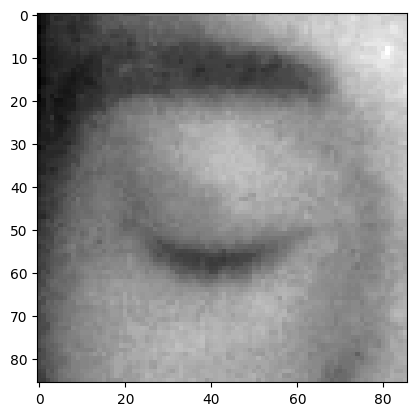

In [4]:
Datadirectory = "./../MRL_DataSet/Test_dataset" ## training dataset
Classes = ["Close-Eyes" , "Open-Eyes"] ## List of classes
for category in Classes:
    path = os.path.join(Datadirectory, category) ## path to open and close eyes
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE) ## read the image
        backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB) ## convert the image to RGB
        plt.imshow(img_array, cmap="gray")
        plt.show( )
        break
    break

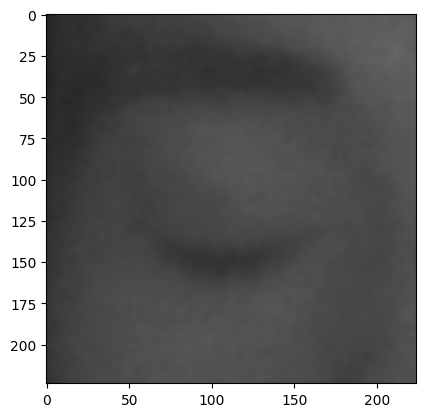

In [5]:
new_array = cv2.resize(backtorgb, (img_size, img_size))
plt.imshow(new_array, cmap="gray")
plt.show()

## Reading all the images and converting them into an array for data and labels

In [6]:
training_Data = [ ] ## data

def create_training_Data():
    for category in Classes:
        path = os.path.join(Datadirectory, category)
        class_num = Classes.index(category) ## 0 or 1,
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
                new_array = cv2. resize(backtorgb, (img_size, img_size))
                training_Data.append( [new_array , class_num])
            except Exception as e:
                pass

In [7]:
create_training_Data()

In [8]:
print(len(training_Data))

17026


In [9]:
random.shuffle(training_Data)

In [10]:
X = []
y = []
for features,label in training_Data:
    X.append(features)
    y.append(label)
X = np.array(X).reshape(-1, img_size, img_size, 3)

X.shape

(17026, 224, 224, 3)

In [11]:
X = X / 255.0; # normalizing the data

In [15]:
y = np.array(y)

pickle_out = open("F:\data\X_pickle","wb")
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out = open("F:\data\y_pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()

In [17]:
pickle_in = open("F:\data\X_pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("F:\data\y_pickle","rb")
y = pickle.load(pickle_in)

## deep learning model for training - Training Learning

In [18]:
model = tf.keras.applications.mobilenet.MobileNet()

17235968/17225924 [==============================] - 23s 1us/step


In [19]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

### Transfer Learning

In [20]:
base_input = model.layers[0].input ## input

In [21]:
base_output = model.layers[-4].output ## output

In [22]:
Flat_layer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(Flat_layer) ## one node (1/0)
final_output = layers.Activation('sigmoid')(final_output)
new_model = keras.Model(inputs = base_input,outputs = final_output)

In [23]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

## settings for binary classification (open I closed)

In [24]:
new_model.compile(loss = "binary_crossentropy",optimizer = "adam", metrics = ["accuracy"])

In [25]:
new_model.fit(X,y,epochs = 1,validation_split = 0.1) ## training

InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run _EagerConst: Dst tensor is not initialized.

In [ ]:
new_model.save('my_model1.h5')